<a href="https://colab.research.google.com/github/christmo/ai-hands-on/blob/main/EmbedingWord2Vwc_Google_News_300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader as api

#Load pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
len(model["man"])

300

Text(-1.2117487550642578, 0.6132331335151194, 'sim=0.73')

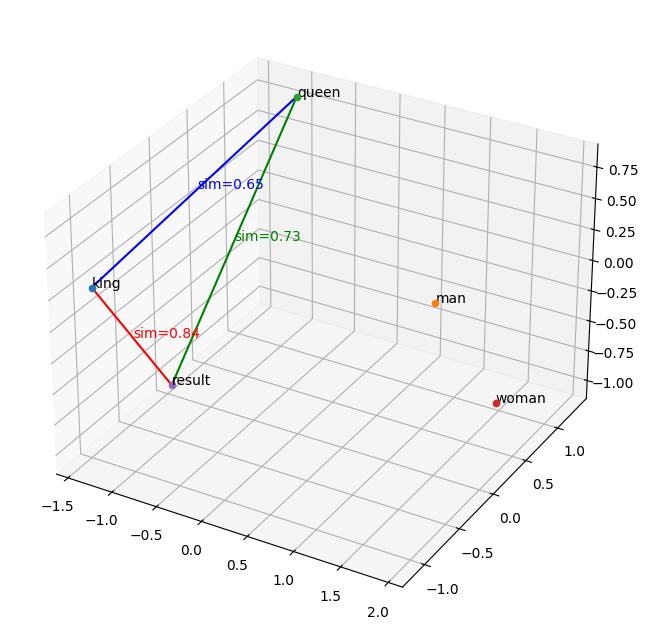

In [ ]:
from sklearn.decomposition import PCA #Principal component analyze
from sklearn.metrics.pairwise import cosine_similarity #Similitud por coseno
import matplotlib.pyplot as plt #Graficar
from mpl_toolkits.mplot3d import Axes3D #3 dimenciones
import numpy as np

v_king = model["king"]
v_man = model["man"]
v_woman = model["woman"]
v_queen = model["queen"]
v_result = v_king - v_man + v_woman

words_to_plot = ["king", "man", "queen", "woman", "result"]
vectors_to_plot = [v_king, v_man, v_queen, v_woman, v_result]

pca = PCA(n_components=3)
reduced = pca.fit_transform(vectors_to_plot)
#Se crea un diccionario donde la llave es la palabra y el contenido el vector
coords = {word: reduced[i] for i, word in enumerate(words_to_plot)}

def cos(a, b):
    return cosine_similarity([a], [b])[0, 0]

#Definimos un plano cartesiano de 10 X 8
fig = plt.figure(figsize=(10, 8))
#Permitimos que la representación se pueda dibujar en 3 dimensiones
ax = fig.add_subplot(111, projection="3d")

#Graficamos todas las palabras
for word, vec in coords.items():
  ax.scatter(vec[0], vec[1], vec[2])
  ax.text(vec[0], vec[1], vec[2], word)

result = coords["result"]
king = coords["king"]
queen = coords["queen"]

#Result - King
ax.plot([result[0], king[0]], [result[1], king[1]], [result[2], king[2]], color = 'red')
mid_rk = (result + king) / 2.0
ax.text(mid_rk[0], mid_rk[1], mid_rk[2],
        f"sim={cos(v_result, v_king):.2f}",
        color = 'red'
        )

#King - Queen
ax.plot([king[0], queen[0]], [king[1], queen[1]], [king[2], queen[2]], color = 'blue')
mid_kq = (king + queen) / 2.0
ax.text(mid_kq[0], mid_kq[1], mid_kq[2],
        f"sim={cos(v_king, v_queen):.2f}",
        color = 'blue'
        )

#Result - Queen
ax.plot([result[0], queen[0]], [result[1], queen[1]], [result[2], queen[2]], color = 'green')
mid_rq = (result + queen) / 2.0
ax.text(mid_rq[0], mid_rq[1], mid_rq[2],
        f"sim={cos(v_result, v_queen):.2f}",
        color = 'green'
        )




In [ ]:
similar_words = model.most_similar(positive=[v_result], topn=10)


print("Top 10 palabras más similares a la operación 'king - man + woman':")
for word, similarity in similar_words:
  print(f"{word}: {similarity:.4f}")

Top 10 palabras más similares a la operación 'king - man + woman':
king: 0.8449
queen: 0.7301
monarch: 0.6455
princess: 0.6156
crown_prince: 0.5819
prince: 0.5777
kings: 0.5614
sultan: 0.5377
Queen_Consort: 0.5344
queens: 0.5290


In [ ]:
similar_words = model.most_similar(positive=[v_king], topn=10)


print("Top 10 palabras más similares a la operación 'king':")
for word, similarity in similar_words:
  print(f"{word}: {similarity:.4f}")

Top 10 palabras más similares a la operación 'kingn':
king: 1.0000
kings: 0.7138
queen: 0.6511
monarch: 0.6413
crown_prince: 0.6204
prince: 0.6160
sultan: 0.5865
ruler: 0.5798
princes: 0.5647
Prince_Paras: 0.5433


In [ ]:
similar_words = model.most_similar(positive=[v_queen], topn=10)


print("Top 10 palabras más similares a la operación 'queen':")
for word, similarity in similar_words:
  print(f"{word}: {similarity:.4f}")

Top 10 palabras más similares a la operación 'queen':
queen: 1.0000
queens: 0.7399
princess: 0.7071
king: 0.6511
monarch: 0.6384
very_pampered_McElhatton: 0.6357
Queen: 0.6163
NYC_anglophiles_aflutter: 0.6061
Queen_Consort: 0.5924
princesses: 0.5908


In [ ]:
similar_words = model.most_similar(positive=model["dog"], topn=10)


print("Top 10 palabras más similares a la operación 'dog':")
for word, similarity in similar_words:
  print(f"{word}: {similarity:.4f}")

Top 10 palabras más similares a la operación 'dog':
dog: 1.0000
dogs: 0.8680
puppy: 0.8106
pit_bull: 0.7804
pooch: 0.7627
cat: 0.7609
golden_retriever: 0.7501
German_shepherd: 0.7465
Rottweiler: 0.7438
beagle: 0.7419
